## Importing Dependencies

In [1]:
# Importing dependencies 
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint as pp
import scipy.stats as stats

## Reading in csv's

In [2]:
# Reading in the requested_counties_df.csv generated by MigrationFlowQuery.ipynb
requested_counties_df = pd.read_csv("../Resources/migration_flow_csvs/requested_counties_df.csv")
requested_counties_df.columns = ["County Name"]
# Reading in the combined_county_df.csv generated by MigrationFlowQuery.ipynb
combined_counties_df = pd.read_csv("../Resources/migration_flow_csvs/combined_county_df.csv")
# Reading in the combined_county_df.csv generated by MigrationFlowQuery.ipynb
counts_by_state_df = pd.read_csv("../Resources/migration_flow_csvs/counts_by_state_df.csv")
#
counts_by_state_df = counts_by_state_df.loc[(counts_by_state_df["Origin State"] != "Kentucky") &
                                            (counts_by_state_df["Origin State"] != "Wyoming")]
# Initializing a list to hold the names of the origin states
origin_states_list = counts_by_state_df["Origin State"]
# Reading in the top_school_per_state_df generated by SchoolsByOriginState.ipynb
top_school_per_state_df = pd.read_csv(f"../Resources/state_schools_csvs/top_schools_per_state.csv") 
state_total_school_points_df = pd.read_csv(f"../Resources/state_schools_csvs/state_total_school_points_df.csv")

In [3]:
# Initializing an list with the names of the query counties
requested_counties_list = requested_counties_df["County Name"]
# Initializing an empty dictionary that will hold each county's grouped_by_state_df
grouped_by_state_dict = {}
grouped_by_county_dict = {}
# Using a for-loop to read each couty's csv as a DataFrame and to udpade grouped_by_state_dict with it as its value 
for county in requested_counties_list:
    formatted_county = county.replace(" ", "_")
    # Reading in each county's csv as a DataFrame
    grouped_by_state_df = pd.read_csv(f"../Resources/migration_flow_csvs/{formatted_county}_origin_by_state.csv")
    grouped_by_county_df = pd.read_csv(f"../Resources/migration_flow_csvs/{formatted_county}_origin_by_county.csv")
    # Updading grouped_by_state_dict
    grouped_by_state_dict.update({county: grouped_by_state_df})
    grouped_by_county_dict.update({county: grouped_by_county_df})

In [4]:
# Initializing an empty DataFrame so that school data can be read in
school_data_by_state_dict = {}
# Using a for-loop to assign school information as values to each state as a key
try:
    for state in origin_states_list:
        # Creating a csv for each of the user-defined query_counties
        state_df = pd.read_csv(f"../Resources/state_schools_csvs/{state}_schools_by_state.csv")
        school_data_by_state_dict.update({state: state_df}) 
except FileNotFoundError:
    pass

## How different are the 5 target counties in terms of their means of the numbers of people from each origin county to move into them?

The null hypothesis for this ANOVA test is that the differences between the means of the number of people migrating to each of query county are not statistically significant.

In [5]:
# Initializing variables to hold the lists of numbers of people to move into them
alameda = grouped_by_county_dict["Alameda County"]["Count"].to_list()
san_francisco = grouped_by_county_dict["San Francisco County"]["Count"].to_list()
santa_clara = grouped_by_county_dict["Santa Clara County"]["Count"].to_list()
san_mateo = grouped_by_county_dict["San Mateo County"]["Count"].to_list()
king = grouped_by_county_dict["King County"]["Count"].to_list()

In [6]:
# Perform the ANOVA
stats.f_oneway(alameda, san_francisco, santa_clara, san_mateo, king)

F_onewayResult(statistic=1.3804202159710088, pvalue=0.2381189605255367)

## How different are the three test counties from each other?

In [7]:
# Initializing variables to hold the lists of numbers of people to move into them
kern = grouped_by_county_dict["Kern County"]["Count"].to_list()
collin = grouped_by_county_dict["Collin County"]["Count"].to_list()
wayne = grouped_by_county_dict["Wayne County"]["Count"].to_list()

In [8]:
# Perform the ANOVA
stats.f_oneway(kern, collin, wayne)

F_onewayResult(statistic=51.543366319520594, pvalue=1.5428955253224995e-22)

In [9]:
count = grouped_by_county_dict["Alameda County"]["Count"].mean()
count

1.4661417322834647

## Differences between individual counties

In [16]:
pval_dict = {}
# Using a for-loop to calculate the p-values of the comparisons between query counties and origin counties
for county_name in requested_counties_list:
    print(county_name)
    print("--------")
    # Initializing a variable to hold the list of counts for each county
    target_county_mean = grouped_by_state_dict[county_name]["Count"]
    # Initializing all_pval_df and its initial index value
    ind = 0
    all_pval_df = pd.DataFrame()
    for county in grouped_by_county_dict:
        print(county)
        # Initiazlizing a value to hold the mean of grouped_by_county_dict[county]
        comparison_county_mean = grouped_by_state_dict[county]["Count"]
    print("********")

Alameda County
--------
Alameda County
San Francisco County
Santa Clara County
San Mateo County
Marin County
Sonoma County
Napa County
Solano County
Contra Costa County
Los Angeles County
Wake County
Cumberland County
Cook County
King County
Kern County
Collin County
Wayne County
********
San Francisco County
--------
Alameda County
San Francisco County
Santa Clara County
San Mateo County
Marin County
Sonoma County
Napa County
Solano County
Contra Costa County
Los Angeles County
Wake County
Cumberland County
Cook County
King County
Kern County
Collin County
Wayne County
********
Santa Clara County
--------
Alameda County
San Francisco County
Santa Clara County
San Mateo County
Marin County
Sonoma County
Napa County
Solano County
Contra Costa County
Los Angeles County
Wake County
Cumberland County
Cook County
King County
Kern County
Collin County
Wayne County
********
San Mateo County
--------
Alameda County
San Francisco County
Santa Clara County
San Mateo County
Marin County
Sonoma Co

## Perfroming ANOVA tests using migrations counts by origin state

In [17]:
# Initializing an empty dictionaries to hold DataFrames containing pvals
pval_dict = {}
# Using a for-loop to calculate the p-values of the comparisons between query counties and origin counties
for county_name in requested_counties_list:
    # Initializing a variable to hold the list of counts for each county
    target_county_mean = grouped_by_state_dict[county_name]["Count"]
    # Initializing all_pval_df and its initial index value
    ind = 0
    all_pval_df = pd.DataFrame()
    for county in grouped_by_county_dict:
        # Initiazlizing a value to hold the mean of grouped_by_county_dict[county]
        comparison_county_mean = grouped_by_state_dict[county]["Count"]
        # Calculate Independent (Two Sample) T-Test
        p_val = stats.ttest_ind(target_county_mean, comparison_county_mean, equal_var=False)[1]
        # Using a conditional to return whether the null hypothesis was accepted or rejected and update pval_df
        if p_val > 0.05:
            pval_df = pd.DataFrame({"Origin State": county,
                                    "P-Value": p_val, 
                                    "Null Hypothesis": "Accepted"}, index=[ind])
            ind+=1
            all_pval_df = all_pval_df.append(pval_df)
           
        elif p_val < 0.05:
            pval_df = pd.DataFrame({"Origin State": county,
                                    "P-Value": p_val, 
                                    "Null Hypothesis": "Rejected"}, index=[ind])
            ind+=1
            all_pval_df = all_pval_df.append(pval_df)
    # Updating pval_dict with the DataFrame containing all of the p-values
    pval_dict.update({county_name: all_pval_df})
    # Displaying the county_name and the p-value dictionary assigned to it
    print(county_name)
    display(pval_dict[county_name].sort_values(["Null Hypothesis"], ascending=True))

Alameda County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,1.000000,Accepted
13,King County,0.334865,Accepted
11,Cumberland County,0.412199,Accepted
10,Wake County,0.794083,Accepted
9,Los Angeles County,0.053512,Accepted
15,Collin County,0.513324,Accepted
7,Solano County,0.065060,Accepted
8,Contra Costa County,0.164141,Accepted
4,Marin County,0.079645,Accepted
3,San Mateo County,0.221501,Accepted


San Francisco County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,0.856088,Accepted
13,King County,0.258097,Accepted
11,Cumberland County,0.512522,Accepted
10,Wake County,0.659592,Accepted
15,Collin County,0.631186,Accepted
7,Solano County,0.079379,Accepted
8,Contra Costa County,0.206946,Accepted
5,Sonoma County,0.050844,Accepted
4,Marin County,0.098118,Accepted
3,San Mateo County,0.279757,Accepted


Santa Clara County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,0.521488,Accepted
13,King County,0.791312,Accepted
12,Cook County,0.125817,Accepted
11,Cumberland County,0.195406,Accepted
10,Wake County,0.682991,Accepted
9,Los Angeles County,0.162025,Accepted
15,Collin County,0.240760,Accepted
8,Contra Costa County,0.090244,Accepted
4,Marin County,0.053316,Accepted
3,San Mateo County,0.114344,Accepted


San Mateo County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,0.221501,Accepted
14,Kern County,0.173946,Accepted
13,King County,0.050132,Accepted
11,Cumberland County,0.627553,Accepted
10,Wake County,0.154585,Accepted
15,Collin County,0.494300,Accepted
7,Solano County,0.350973,Accepted
8,Contra Costa County,0.814173,Accepted
5,Sonoma County,0.212684,Accepted
4,Marin County,0.437038,Accepted


Marin County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,0.079645,Accepted
14,Kern County,0.499763,Accepted
11,Cumberland County,0.227989,Accepted
10,Wake County,0.057399,Accepted
15,Collin County,0.164203,Accepted
7,Solano County,0.851503,Accepted
8,Contra Costa County,0.586511,Accepted
5,Sonoma County,0.604418,Accepted
4,Marin County,1.000000,Accepted
3,San Mateo County,0.437038,Accepted


Sonoma County


,Origin State,P-Value,Null Hypothesis
8,Contra Costa County,0.305182,Accepted
1,San Francisco County,0.050844,Accepted
14,Kern County,0.840441,Accepted
3,San Mateo County,0.212684,Accepted
4,Marin County,0.604418,Accepted
5,Sonoma County,1.000000,Accepted
6,Napa County,0.439411,Accepted
7,Solano County,0.757441,Accepted
15,Collin County,0.074394,Accepted
11,Cumberland County,0.106762,Accepted


Napa County


,Origin State,P-Value,Null Hypothesis
8,Contra Costa County,0.118915,Accepted
14,Kern County,0.587693,Accepted
3,San Mateo County,0.080714,Accepted
4,Marin County,0.244049,Accepted
5,Sonoma County,0.439411,Accepted
6,Napa County,1.000000,Accepted
7,Solano County,0.336378,Accepted
13,King County,0.007160,Rejected
12,Cook County,0.003827,Rejected
11,Cumberland County,0.042556,Rejected


Solano County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,0.065060,Accepted
14,Kern County,0.636596,Accepted
11,Cumberland County,0.180579,Accepted
15,Collin County,0.128828,Accepted
7,Solano County,1.000000,Accepted
6,Napa County,0.336378,Accepted
8,Contra Costa County,0.479521,Accepted
4,Marin County,0.851503,Accepted
3,San Mateo County,0.350973,Accepted
1,San Francisco County,0.079379,Accepted


Contra Costa County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,0.164141,Accepted
14,Kern County,0.250663,Accepted
11,Cumberland County,0.479943,Accepted
10,Wake County,0.114923,Accepted
15,Collin County,0.367287,Accepted
7,Solano County,0.479521,Accepted
8,Contra Costa County,1.000000,Accepted
5,Sonoma County,0.305182,Accepted
4,Marin County,0.586511,Accepted
3,San Mateo County,0.814173,Accepted


Los Angeles County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,0.053512,Accepted
2,Santa Clara County,0.162025,Accepted
13,King County,0.223306,Accepted
12,Cook County,0.824140,Accepted
10,Wake County,0.078423,Accepted
9,Los Angeles County,1.000000,Accepted
14,Kern County,0.004183,Rejected
11,Cumberland County,0.018127,Rejected
8,Contra Costa County,0.009284,Rejected
7,Solano County,0.005524,Rejected


Wake County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,0.794083,Accepted
13,King County,0.474294,Accepted
12,Cook County,0.063823,Accepted
11,Cumberland County,0.292571,Accepted
10,Wake County,1.000000,Accepted
9,Los Angeles County,0.078423,Accepted
15,Collin County,0.369283,Accepted
8,Contra Costa County,0.114923,Accepted
4,Marin County,0.057399,Accepted
3,San Mateo County,0.154585,Accepted


Cumberland County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,0.412199,Accepted
14,Kern County,0.087944,Accepted
13,King County,0.096674,Accepted
11,Cumberland County,1.000000,Accepted
10,Wake County,0.292571,Accepted
15,Collin County,0.844345,Accepted
7,Solano County,0.180579,Accepted
8,Contra Costa County,0.479943,Accepted
5,Sonoma County,0.106762,Accepted
4,Marin County,0.227989,Accepted


Cook County


,Origin State,P-Value,Null Hypothesis
2,Santa Clara County,0.125817,Accepted
13,King County,0.171529,Accepted
12,Cook County,1.000000,Accepted
10,Wake County,0.063823,Accepted
9,Los Angeles County,0.824140,Accepted
0,Alameda County,0.045043,Rejected
14,Kern County,0.004790,Rejected
11,Cumberland County,0.017208,Rejected
8,Contra Costa County,0.009579,Rejected
7,Solano County,0.006095,Rejected


King County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,0.334865,Accepted
1,San Francisco County,0.258097,Accepted
2,Santa Clara County,0.791312,Accepted
3,San Mateo County,0.050132,Accepted
13,King County,1.000000,Accepted
12,Cook County,0.171529,Accepted
11,Cumberland County,0.096674,Accepted
15,Collin County,0.124836,Accepted
9,Los Angeles County,0.223306,Accepted
10,Wake County,0.474294,Accepted


King County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,0.334865,Accepted
1,San Francisco County,0.258097,Accepted
2,Santa Clara County,0.791312,Accepted
3,San Mateo County,0.050132,Accepted
13,King County,1.000000,Accepted
12,Cook County,0.171529,Accepted
11,Cumberland County,0.096674,Accepted
15,Collin County,0.124836,Accepted
9,Los Angeles County,0.223306,Accepted
10,Wake County,0.474294,Accepted


Kern County


,Origin State,P-Value,Null Hypothesis
8,Contra Costa County,0.250663,Accepted
14,Kern County,1.000000,Accepted
3,San Mateo County,0.173946,Accepted
4,Marin County,0.499763,Accepted
5,Sonoma County,0.840441,Accepted
6,Napa County,0.587693,Accepted
7,Solano County,0.636596,Accepted
15,Collin County,0.061210,Accepted
11,Cumberland County,0.087944,Accepted
13,King County,0.010823,Rejected


Collin County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,0.513324,Accepted
14,Kern County,0.061210,Accepted
13,King County,0.124836,Accepted
11,Cumberland County,0.844345,Accepted
10,Wake County,0.369283,Accepted
15,Collin County,1.000000,Accepted
7,Solano County,0.128828,Accepted
8,Contra Costa County,0.367287,Accepted
5,Sonoma County,0.074394,Accepted
4,Marin County,0.164203,Accepted


Wayne County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,0.002697,Rejected
1,San Francisco County,0.002469,Rejected
2,Santa Clara County,0.006097,Rejected
3,San Mateo County,0.001701,Rejected
4,Marin County,0.001897,Rejected
5,Sonoma County,0.000725,Rejected
6,Napa County,0.014440,Rejected
7,Solano County,0.003484,Rejected
8,Contra Costa County,0.002174,Rejected
9,Los Angeles County,0.001365,Rejected


## Perfroming ANOVA tests using migrations counts by origin county

In [10]:
# Initializing an empty dictionaries to hold DataFrames containing pvals
pval_dict = {}
# Using a for-loop to calculate the p-values of the comparisons between query counties and origin counties
for county_name in requested_counties_list:
    # Initializing a variable to hold the list of counts for each county
    target_county_mean = grouped_by_county_dict[county_name]["Count"]
    # Initializing all_pval_df and its initial index value
    ind = 0
    all_pval_df = pd.DataFrame()
    for county in grouped_by_county_dict:
        # Initiazlizing a value to hold the mean of grouped_by_county_dict[county]
        comparison_county_mean = grouped_by_county_dict[county]["Count"]
        # Calculate Independent (Two Sample) T-Test
        p_val = stats.ttest_ind(target_county_mean, comparison_county_mean, equal_var=False)[1]
        # Using a conditional to return whether the null hypothesis was accepted or rejected and update pval_df
        if p_val > 0.05:
            pval_df = pd.DataFrame({"Origin State": county,
                                    "P-Value": p_val, 
                                    "Null Hypothesis": "Accepted"}, index=[ind])
            ind+=1
            all_pval_df = all_pval_df.append(pval_df)
           
        elif p_val < 0.05:
            pval_df = pd.DataFrame({"Origin State": county,
                                    "P-Value": p_val, 
                                    "Null Hypothesis": "Rejected"}, index=[ind])
            ind+=1
            all_pval_df = all_pval_df.append(pval_df)
    # Updating pval_dict with the DataFrame containing all of the p-values
    pval_dict.update({county_name: all_pval_df})
    # Displaying the county_name and the p-value dictionary assigned to it
    print(county_name)
    display(pval_dict[county_name].sort_values(["Null Hypothesis"], ascending=True))

Alameda County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,1.000000e+00,Accepted
1,San Francisco County,5.491415e-01,Accepted
2,Santa Clara County,2.148240e-01,Accepted
3,San Mateo County,1.214974e-01,Accepted
13,King County,7.000957e-01,Accepted
10,Wake County,3.302092e-01,Accepted
14,Kern County,2.561639e-11,Rejected
12,Cook County,2.376864e-06,Rejected
11,Cumberland County,8.565533e-03,Rejected
8,Contra Costa County,4.636665e-03,Rejected


San Francisco County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,5.491415e-01,Accepted
1,San Francisco County,1.000000e+00,Accepted
2,Santa Clara County,5.128045e-01,Accepted
13,King County,8.048699e-01,Accepted
10,Wake County,7.452153e-01,Accepted
9,Los Angeles County,1.281176e-01,Accepted
14,Kern County,5.193082e-11,Rejected
12,Cook County,6.219068e-05,Rejected
11,Cumberland County,2.270986e-03,Rejected
8,Contra Costa County,1.235029e-03,Rejected


Santa Clara County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,2.148240e-01,Accepted
1,San Francisco County,5.128045e-01,Accepted
2,Santa Clara County,1.000000e+00,Accepted
13,King County,3.563932e-01,Accepted
10,Wake County,7.067790e-01,Accepted
9,Los Angeles County,4.511319e-01,Accepted
14,Kern County,4.488732e-11,Rejected
12,Cook County,1.405109e-03,Rejected
11,Cumberland County,4.709686e-04,Rejected
8,Contra Costa County,2.577141e-04,Rejected


San Mateo County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,1.214974e-01,Accepted
11,Cumberland County,3.781433e-01,Accepted
15,Collin County,1.027115e-01,Accepted
4,Marin County,2.581185e-01,Accepted
8,Contra Costa County,2.452471e-01,Accepted
3,San Mateo County,1.000000e+00,Accepted
5,Sonoma County,3.956839e-03,Rejected
6,Napa County,3.865621e-05,Rejected
7,Solano County,3.704009e-03,Rejected
2,Santa Clara County,1.019165e-02,Rejected


Marin County


,Origin State,P-Value,Null Hypothesis
8,Contra Costa County,9.747640e-01,Accepted
3,San Mateo County,2.581185e-01,Accepted
4,Marin County,1.000000e+00,Accepted
5,Sonoma County,7.156299e-02,Accepted
7,Solano County,6.778443e-02,Accepted
15,Collin County,6.499401e-01,Accepted
11,Cumberland County,6.885908e-01,Accepted
14,Kern County,2.285143e-05,Rejected
13,King County,1.463580e-03,Rejected
12,Cook County,1.634057e-12,Rejected


Sonoma County


,Origin State,P-Value,Null Hypothesis
4,Marin County,7.156299e-02,Accepted
5,Sonoma County,1.000000e+00,Accepted
6,Napa County,6.831464e-02,Accepted
7,Solano County,9.726532e-01,Accepted
15,Collin County,1.308605e-01,Accepted
0,Alameda County,5.607250e-06,Rejected
14,Kern County,2.716766e-03,Rejected
13,King County,3.850143e-07,Rejected
12,Cook County,1.127559e-17,Rejected
11,Cumberland County,9.383258e-03,Rejected


Napa County


,Origin State,P-Value,Null Hypothesis
14,Kern County,5.342281e-01,Accepted
5,Sonoma County,6.831464e-02,Accepted
6,Napa County,1.000000e+00,Accepted
7,Solano County,7.391519e-02,Accepted
0,Alameda County,1.663457e-08,Rejected
13,King County,6.895860e-10,Rejected
12,Cook County,1.255247e-20,Rejected
11,Cumberland County,3.352206e-05,Rejected
10,Wake County,8.475585e-11,Rejected
8,Contra Costa County,4.538163e-04,Rejected


Solano County


,Origin State,P-Value,Null Hypothesis
4,Marin County,6.778443e-02,Accepted
5,Sonoma County,9.726532e-01,Accepted
6,Napa County,7.391519e-02,Accepted
7,Solano County,1.000000e+00,Accepted
15,Collin County,1.238226e-01,Accepted
0,Alameda County,5.149301e-06,Rejected
14,Kern County,3.196542e-03,Rejected
13,King County,3.508626e-07,Rejected
12,Cook County,1.016834e-17,Rejected
11,Cumberland County,8.684496e-03,Rejected


Contra Costa County


,Origin State,P-Value,Null Hypothesis
8,Contra Costa County,1.000000e+00,Accepted
3,San Mateo County,2.452471e-01,Accepted
4,Marin County,9.747640e-01,Accepted
11,Cumberland County,6.909113e-01,Accepted
15,Collin County,5.997706e-01,Accepted
14,Kern County,1.790866e-06,Rejected
13,King County,9.291763e-04,Rejected
12,Cook County,4.645110e-13,Rejected
10,Wake County,1.372061e-04,Rejected
0,Alameda County,4.636665e-03,Rejected


Los Angeles County


,Origin State,P-Value,Null Hypothesis
1,San Francisco County,1.281176e-01,Accepted
2,Santa Clara County,4.511319e-01,Accepted
13,King County,5.951094e-02,Accepted
10,Wake County,2.100545e-01,Accepted
9,Los Angeles County,1.000000e+00,Accepted
0,Alameda County,2.614335e-02,Rejected
14,Kern County,5.650190e-18,Rejected
12,Cook County,7.283839e-03,Rejected
11,Cumberland County,7.542469e-07,Rejected
8,Contra Costa County,4.035093e-07,Rejected


Wake County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,3.302092e-01,Accepted
1,San Francisco County,7.452153e-01,Accepted
2,Santa Clara County,7.067790e-01,Accepted
13,King County,5.421263e-01,Accepted
10,Wake County,1.000000e+00,Accepted
9,Los Angeles County,2.100545e-01,Accepted
14,Kern County,6.252078e-14,Rejected
12,Cook County,1.242292e-04,Rejected
11,Cumberland County,2.615429e-04,Rejected
8,Contra Costa County,1.372061e-04,Rejected


Cumberland County


,Origin State,P-Value,Null Hypothesis
8,Contra Costa County,6.909113e-01,Accepted
3,San Mateo County,3.781433e-01,Accepted
4,Marin County,6.885908e-01,Accepted
11,Cumberland County,1.000000e+00,Accepted
15,Collin County,3.298327e-01,Accepted
14,Kern County,7.513010e-09,Rejected
13,King County,1.766903e-03,Rejected
12,Cook County,8.115698e-13,Rejected
10,Wake County,2.615429e-04,Rejected
0,Alameda County,8.565533e-03,Rejected


Cook County


,Origin State,P-Value,Null Hypothesis
12,Cook County,1.000000e+00,Accepted
0,Alameda County,2.376864e-06,Rejected
14,Kern County,5.492421e-24,Rejected
13,King County,8.944669e-06,Rejected
11,Cumberland County,8.115698e-13,Rejected
10,Wake County,1.242292e-04,Rejected
9,Los Angeles County,7.283839e-03,Rejected
15,Collin County,2.389157e-14,Rejected
8,Contra Costa County,4.645110e-13,Rejected
6,Napa County,1.255247e-20,Rejected


King County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,7.000957e-01,Accepted
1,San Francisco County,8.048699e-01,Accepted
2,Santa Clara County,3.563932e-01,Accepted
13,King County,1.000000e+00,Accepted
10,Wake County,5.421263e-01,Accepted
9,Los Angeles County,5.951094e-02,Accepted
14,Kern County,3.088254e-13,Rejected
12,Cook County,8.944669e-06,Rejected
11,Cumberland County,1.766903e-03,Rejected
8,Contra Costa County,9.291763e-04,Rejected


King County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,7.000957e-01,Accepted
1,San Francisco County,8.048699e-01,Accepted
2,Santa Clara County,3.563932e-01,Accepted
13,King County,1.000000e+00,Accepted
10,Wake County,5.421263e-01,Accepted
9,Los Angeles County,5.951094e-02,Accepted
14,Kern County,3.088254e-13,Rejected
12,Cook County,8.944669e-06,Rejected
11,Cumberland County,1.766903e-03,Rejected
8,Contra Costa County,9.291763e-04,Rejected


Kern County


,Origin State,P-Value,Null Hypothesis
14,Kern County,1.000000e+00,Accepted
6,Napa County,5.342281e-01,Accepted
0,Alameda County,2.561639e-11,Rejected
13,King County,3.088254e-13,Rejected
12,Cook County,5.492421e-24,Rejected
11,Cumberland County,7.513010e-09,Rejected
10,Wake County,6.252078e-14,Rejected
9,Los Angeles County,5.650190e-18,Rejected
8,Contra Costa County,1.790866e-06,Rejected
7,Solano County,3.196542e-03,Rejected


Collin County


,Origin State,P-Value,Null Hypothesis
8,Contra Costa County,5.997706e-01,Accepted
3,San Mateo County,1.027115e-01,Accepted
4,Marin County,6.499401e-01,Accepted
5,Sonoma County,1.308605e-01,Accepted
7,Solano County,1.238226e-01,Accepted
15,Collin County,1.000000e+00,Accepted
11,Cumberland County,3.298327e-01,Accepted
14,Kern County,1.002308e-05,Rejected
13,King County,1.389361e-04,Rejected
12,Cook County,2.389157e-14,Rejected


Wayne County


,Origin State,P-Value,Null Hypothesis
0,Alameda County,5.567436e-20,Rejected
1,San Francisco County,7.003351e-18,Rejected
2,Santa Clara County,5.209003e-17,Rejected
3,San Mateo County,1.973123e-14,Rejected
4,Marin County,5.593612e-13,Rejected
5,Sonoma County,1.247504e-13,Rejected
6,Napa County,2.657006e-05,Rejected
7,Solano County,1.686316e-13,Rejected
8,Contra Costa County,4.220791e-17,Rejected
9,Los Angeles County,1.441657e-27,Rejected


## Is there a correlation between the highest rank of a school in a state and the number of people to move a given state from that state?

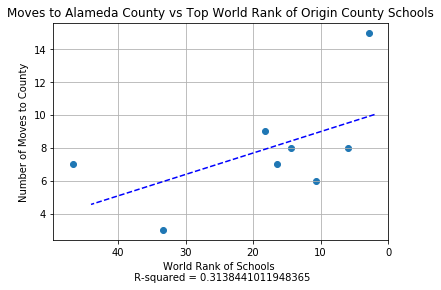

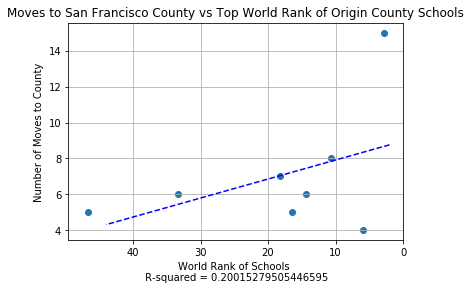

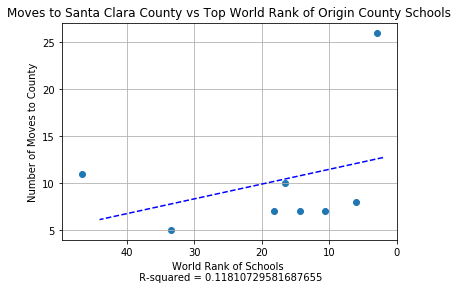

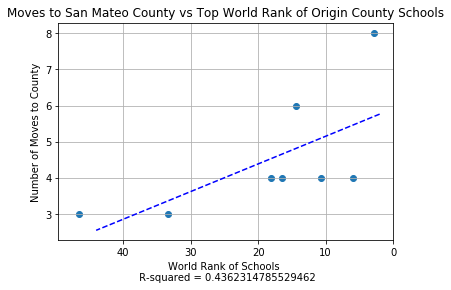

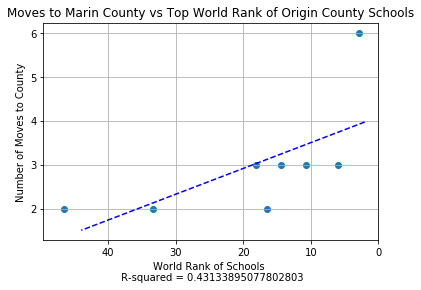

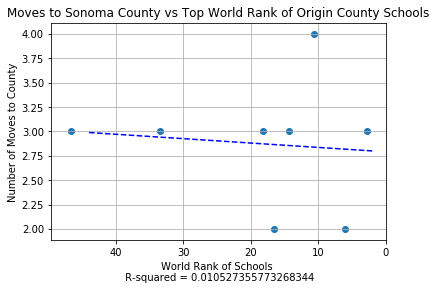

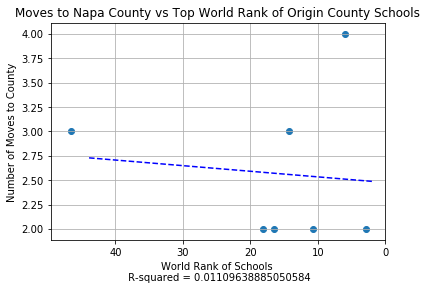

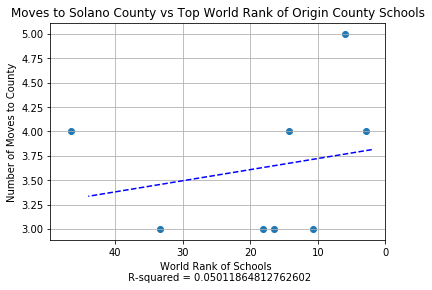

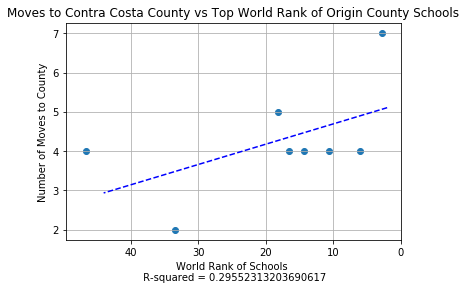

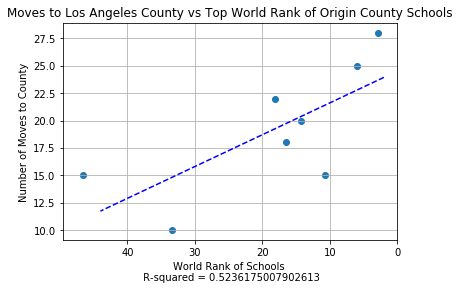

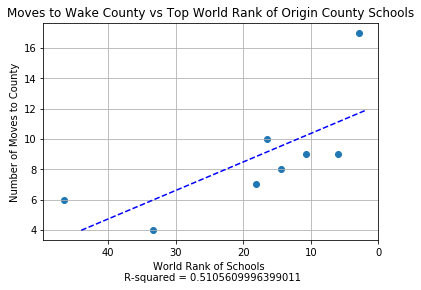

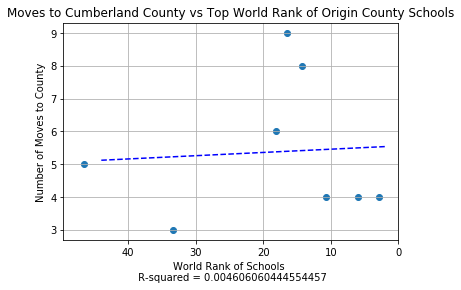

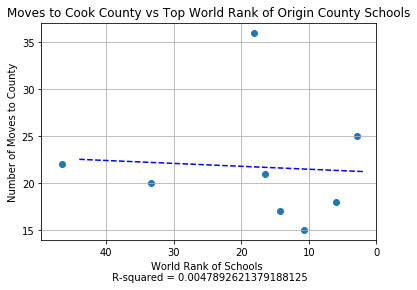

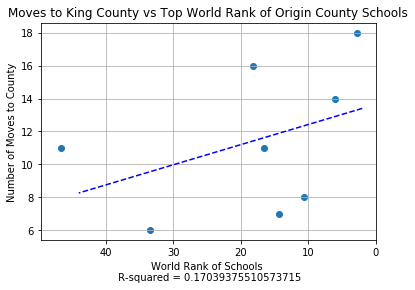

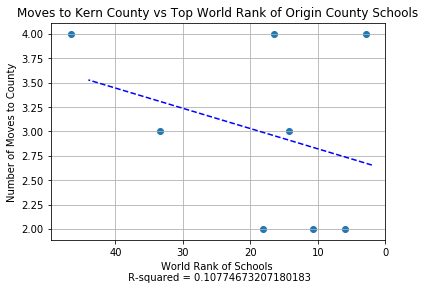

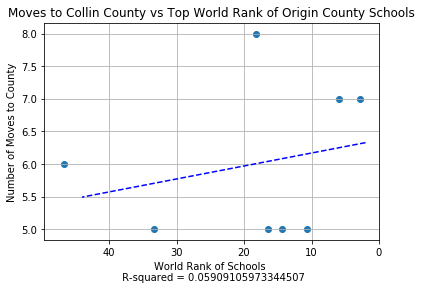

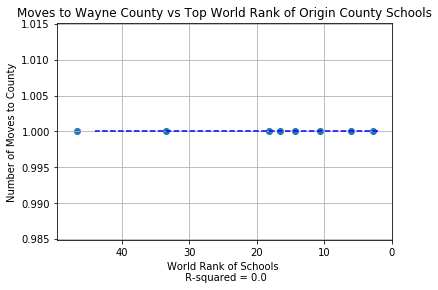

In [11]:
# Merge origin_counts_schools_dict["Alameda County"] and top_school_per_state_df
top_school_and_count_dict = {}
top_school_per_state_df = top_school_per_state_df.rename(index=str, columns={"State": "Origin State"})
# Using a for-loop to merge top_school_per_state_df and grouped_by_state_dict and create plots

for county in grouped_by_state_dict:
    # Merging top_school_per_state_df and grouped_by_state_dict
    merged_df = pd.merge(top_school_per_state_df, grouped_by_state_dict[county], on="Origin State")
    # Updating the dictionary that will hold all of the merged DataFrames
    top_school_and_count_dict.update({county: merged_df})
    # Initializing values to hold the highest and lowest rank given to schools in top_school_per_state_df
    highest_rank = top_school_per_state_df["World Rank"].min()
    lowest_rank = top_school_per_state_df["World Rank"].max()
    # Initializing x and y values for the plots
    x = top_school_and_count_dict[county]["World Rank"].to_list()
    y = top_school_and_count_dict[county]["Count"].to_list()
    # Plotting school number of people to move to a county from each origin county as a function of school rank in 
    # those counties
    plt.scatter(x, y)
    plt.xlim(lowest_rank+3, 0)  # decreasing time
    # Plotting the line of best fit and calculating the r-value
    x_axis = np.arange(2, 50, 6)
    y = top_school_and_count_dict[county]["Count"].to_list()
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x[0:len(y)], y)
    fit = slope * x_axis + intercept 
    plt.plot(x_axis, fit, 'b--')
    # Formatting the plot area
    plt.xlabel(f"World Rank of Schools \n R-squared = {r_value**2}")
    plt.ylabel("Number of Moves to County")
    plt.title(f"Moves to {county} vs Top World Rank of Origin County Schools")
    plt.grid(True)
    # Saving each plot as its own image
    formatted_county_name = county.replace(" ", "_")
    # Displaying each plot at the end of each loop
    plt.show()

## Is there a correlation between the total strength of schools in a state and the number of people to move a given state from that state?

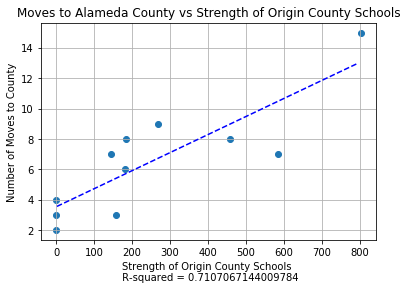

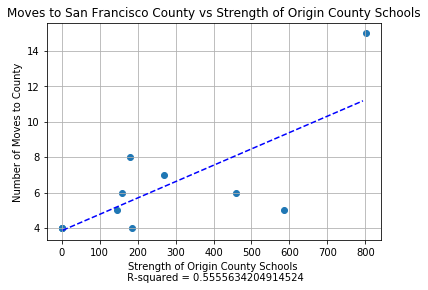

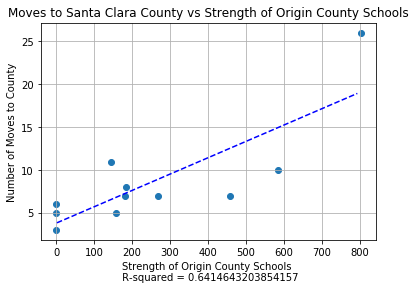

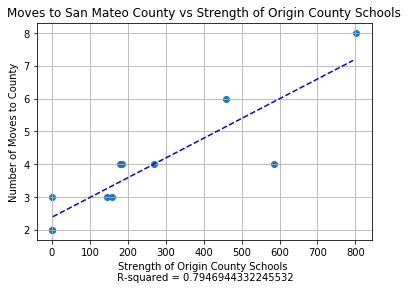

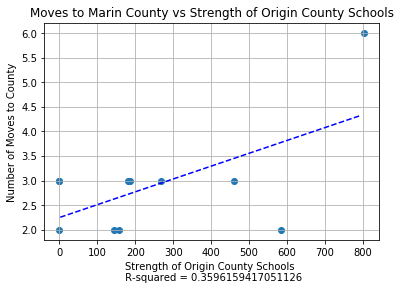

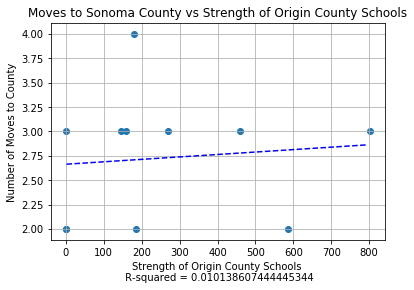

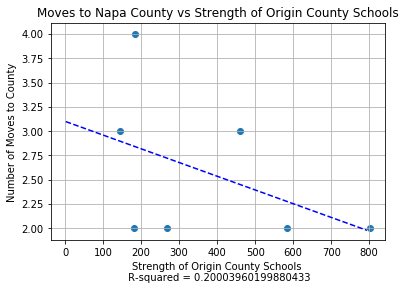

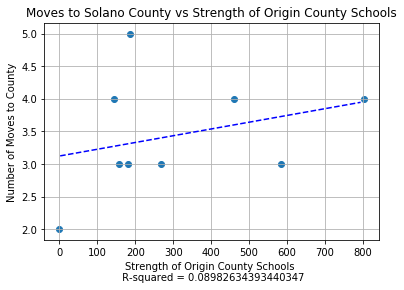

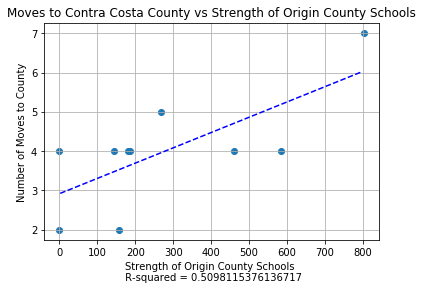

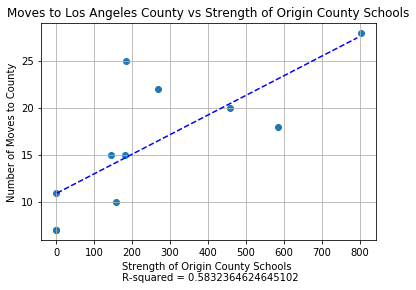

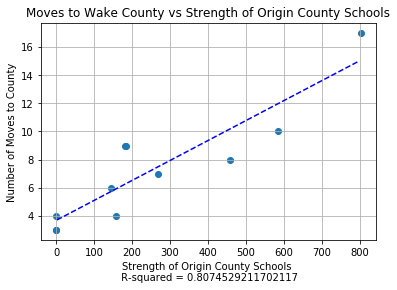

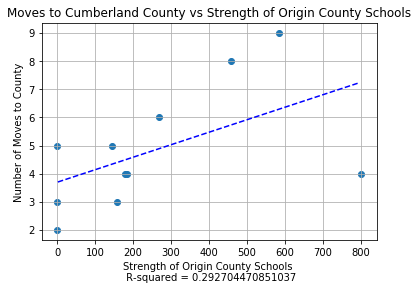

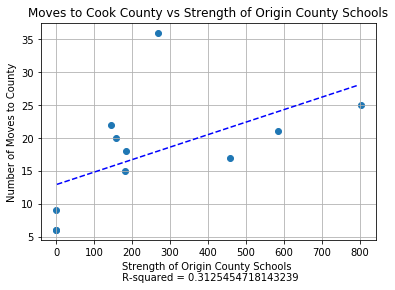

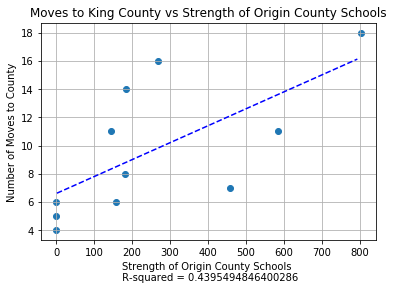

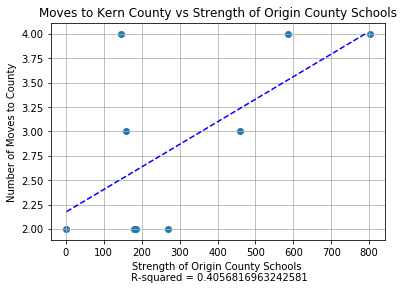

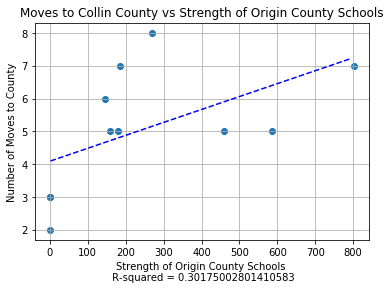

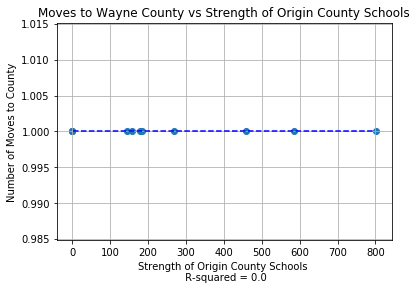

In [14]:
# Merge origin_counts_schools_dict["Alameda County"] and top_school_per_state_df
top_school_and_count_dict = {}
state_total_school_points_df = state_total_school_points_df.rename(index=str, columns={"State": "Origin State"})
# Using a for-loop to merge top_school_per_state_df and grouped_by_state_dict and create plots

for county in grouped_by_state_dict:
    # Merging top_school_per_state_df and grouped_by_state_dict
    merged_df = pd.merge(state_total_school_points_df, grouped_by_state_dict[county], on="Origin State")
    # Updating the dictionary that will hold all of the merged DataFrames
    top_school_and_count_dict.update({county: merged_df})
    # Initializing values to hold the highest and lowest rank given to schools in top_school_per_state_df
    highest_rank = state_total_school_points_df["Total Points"].min()
    lowest_rank = state_total_school_points_df["Total Points"].max()
    # Initializing x and y values for the plots
    x = top_school_and_count_dict[county]["Total Points"].to_list()
    y = top_school_and_count_dict[county]["Count"].to_list()
    # Plotting school number of people to move to a county from each origin county as a function of school rank in 
    # those counties
    plt.scatter(x, y)
#     plt.xlim(0)  # decreasing time
    # Plotting the line of best fit and calculating the r-value
    x_axis = np.arange(2, 800, 6)
    x_rounded = [round(val) for val in x]
    x_rounded.sort()
    y = top_school_and_count_dict[county]["Count"].to_list()
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x[0:len(y)], y)
    fit = slope * x_axis + intercept 
    plt.plot(x_axis, fit, 'b--')
    # Formatting the plot area
    plt.xlabel(f"Strength of Origin County Schools \n R-squared = {r_value**2}")
    plt.ylabel("Number of Moves to County")
    plt.title(f"Moves to {county} vs Strength of Origin County Schools")
    plt.grid(True)
    # Saving each plot as its own image
    formatted_county_name = county.replace(" ", "_")
    plt.savefig(f"../Images/LinearRegressions/to_{formatted_county_name}_v_school_regression.png",
                dpi=300, bbox_inches = "tight")
    #Displaying each plot at the end of each loop
    plt.show()
    